# **Basic Info**

1. Prediction of residuary resistance of sailing yachts at the initial design stage is of a great value for evaluating the ships performance and for estimating the required propulsive power. Variations concern hull geometry coefficients and the Froude number:
 * Longitudinal position of the center of buoyancy, adimensional.
 * Prismatic coefficient, adimensional.
 * Length-displacement ratio, adimensional.
 * Beam-draught ratio, adimensional.
 * Length-beam ratio, adimensional.
 * Froude number, adimensional.

 The measured variable is the residuary resistance per unit weight of displacement:

 *  Residuary resistance per unit weight of   displacement, adimensional.



2. Running the data.info () function we find that the number of samples is 308 and the number of attributes is 7. There are no ordered values. Running the data.dtypes function we see that the attributes of the whole dataset are real numbers


3. No, running the data.head () function we can see that there is no numbering in the lines and there are no headings


4. The 7th column is the target

5. We converted the file from .data to .xlsx in order to load the dataset in the notebook


6. Running the  data.isnull().values.any() function we can see that there are no missing values ​​in the dataset


In [ ]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install pandas --upgrade #--upgrade #upgrade pandas package

     |████████████████████████████████| 1.5MB 19.5MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 15.3 MB 107 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.4.1 requires numpy~=1.19.2, but you have numpy 1.20.1 which is incompatible.
jaxlib 0.1.60+cuda101 requires numpy<1.20,>=1.12, but you have numpy 1.20.1 which is incompatible.
dat

     |████████████████████████████████| 9.9 MB 19.1 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.2.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.metrics import median_absolute_error as mae
import time


#load time matrixes

times_train_bef = {} 

times_test_bef = {}

times_train_aft = {}

times_test_aft = {}

#load dataset
data = pd.read_excel("S03.xlsx",header=None)

X = data.iloc[0:,:-1]
y = data.iloc[:,6]

# **Train-Test Split**

In [ ]:
# Train-Test Split: 33% of our dataset->test data and the rest-> train data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

print(x_train)
print(y_train)

       0      1     2     3     4      5
26  -2.3  0.569  4.78  3.04  3.64  0.425
221 -2.3  0.530  4.34  2.81  3.15  0.400
257  0.0  0.530  4.78  3.75  3.15  0.250
38  -2.3  0.565  4.78  5.35  2.76  0.375
107 -2.4  0.585  4.78  3.84  3.32  0.350
..   ...    ...   ...   ...   ...    ...
55  -2.3  0.564  5.10  3.95  3.53  0.450
0   -2.3  0.568  4.78  3.99  3.17  0.125
2   -2.3  0.568  4.78  3.99  3.17  0.175
177 -5.0  0.565  5.10  3.94  3.51  0.350
82  -2.4  0.568  4.34  2.98  3.15  0.425

[206 rows x 6 columns]
26     35.01
221    25.18
257     1.94
38     13.08
107     8.04
       ...  
55     50.36
0       0.11
2       0.47
177     7.74
82     34.50
Name: 6, Length: 206, dtype: float64


# **Baseline Regressors**

**Generally Info for Regressors:**


*   **Ordinary Least Squares Regressor**: LinearRegression fits a linear model with coefficients to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation
*  **Ridge Regressor**: Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares.

*   **Polynomial Regressor**: Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. 
* **MLP Regressor**: This model optimizes the squared-loss using LBFGS or stochastic gradient descent.
* **Kernel ridge Regressor**: Combines ridge regression (linear least squares with l2-norm regularization) with the kernel trick. It thus learns a linear function in the space induced by the respective kernel and the data. For non-linear kernels, this corresponds to a non-linear function in the original spa.
*   **Random Forest Regressor**: A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
* **Hist Gradient Boosting Regressor**: This estimator has native support for missing values (NaNs). During training, the tree grower learns at each split point whether samples with missing values should go to the left or right child, based on the potential gain. When predicting, samples with missing values are assigned to the left or right child consequently. If no missing values were encountered for a given feature during training, then samples with missing values are mapped to whichever child has the most samples.

**Generally Info for Accuracy Metrics:**

* **Mean Squared Error**: measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. 
* **R-squared**:  is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). The coefficient of determination normally ranges from 0 to 1. For instance, an R-squared equals to 1 means that all movements of dependent variable are completely explained by movements of independent variable(s). R-squared is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.
* **Mean absolute error**: is a measure of errors between paired observations expressing the same phenomenon.




## **Ordinary Least Squares Regressor**



In [ ]:
from sklearn import linear_model

olsr = linear_model.LinearRegression()

start_time = time.time()

olsr.fit(x_train,y_train)

times_train_bef['olsr'] = time.time() - start_time

start_time = time.time()

olsr_preds = olsr.predict(x_test)

times_test_bef['olsr'] = time.time() - start_time

olsr_mse_score = mse(y_test, olsr_preds)

olsr_r2_score = r2(y_test, olsr_preds)

olsr_mae_score = mae(y_test, olsr_preds)



## **Ridge Regressor**



In [ ]:
from sklearn.linear_model import Ridge

rr = Ridge()

start_time = time.time()

rr.fit(x_train, y_train)

times_train_bef['rr'] = time.time() - start_time

start_time = time.time()

rr_preds = rr.predict(x_test)

times_test_bef['rr'] = time.time() - start_time

rr_mse_score = mse(y_test, rr_preds)

rr_r2_score = r2(y_test, rr_preds)

rr_mae_score = mae(y_test, rr_preds)

## **Polynomial Regressor**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression

pr = PolynomialFeatures()

start_time = time.time()

x_train_new = pr.fit_transform(x_train)

times_train_bef['pr'] = time.time() - start_time

start_time = time.time()

x_test_new = pr.fit_transform(x_test)

times_test_bef['pr'] = time.time() - start_time

#linear regression for the prediction

lre = LinearRegression()

lre.fit(x_train_new, y_train)

pr_preds = lre.predict(x_test_new)

pr_mse_score = mse(y_test, pr_preds)

pr_r2_score = r2(y_test, pr_preds)

pr_mae_score = mae(y_test, pr_preds)



## **MLP Regressor**



In [ ]:
from sklearn.neural_network import MLPRegressor

mlpr = MLPRegressor()

start_time = time.time()

mlpr.fit(x_train, y_train)

times_train_bef['mlpr'] = time.time() - start_time

start_time = time.time()

mlpr_preds = mlpr.predict(x_test)

times_test_bef['mlpr'] = time.time() - start_time

mlpr_mse_score = mse(y_test, mlpr_preds)

mlpr_r2_score = r2(y_test, mlpr_preds)

mlpr_mae_score = mae(y_test, mlpr_preds)


## **Kernel Ridge Regressor**



In [ ]:
from sklearn.kernel_ridge import KernelRidge

krr = KernelRidge()

start_time = time.time()

krr.fit(x_train, y_train)

times_train_bef['krr'] = time.time() - start_time

start_time = time.time()

krr_preds = krr.predict(x_test)

times_test_bef['krr'] = time.time() - start_time

krr_mse_score = mse(y_test, krr_preds)

krr_r2_score = r2(y_test, krr_preds)

krr_mae_score = mae(y_test, krr_preds)



## **Random Forest Regressor**



In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

start_time = time.time()

rfr.fit(x_train, y_train)

times_train_bef['rfr'] = time.time() - start_time

start_time = time.time()

rfr_preds = rfr.predict(x_test)

times_test_bef['rfr'] = time.time() - start_time

rfr_mse_score = mse(y_test, rfr_preds)

rfr_r2_score = r2(y_test, rfr_preds)

rfr_mae_score = mae(y_test, rfr_preds)



## **Hist Gradient Boosting Regressor**



In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor

hgbr = HistGradientBoostingRegressor()

start_time = time.time()

hgbr.fit(x_train, y_train)

times_train_bef['hgbr'] = time.time() - start_time

start_time = time.time()

hgbr_preds = hgbr.predict(x_test)

times_test_bef['hgbr'] = time.time() - start_time

hgbr_mse_score = mse(y_test, hgbr_preds)

hgbr_r2_score = r2(y_test, hgbr_preds)

hgbr_mae_score = mae(y_test, hgbr_preds)

# **Bar Plot**



## **Mean Square Error**



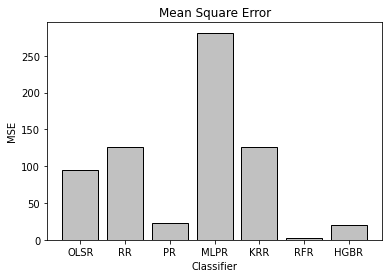

In [ ]:
# Mean Square Error

import matplotlib.pyplot as plt 

estimators = ('OLSR','RR','PR','MLPR','KRR','RFR','HGBR')

mse_score1 = (olsr_mse_score, rr_mse_score, pr_mse_score, mlpr_mse_score, krr_mse_score, rfr_mse_score,hgbr_mse_score)

plt.bar(estimators , mse_score1, color=(0.6, 0.6, 0.6, 0.6),  edgecolor='black')

plt.ylabel('MSE')

plt.xlabel('Classifier')

plt.title('Mean Square Error')

plt.show()



## **R² or Coefficient of Determination**



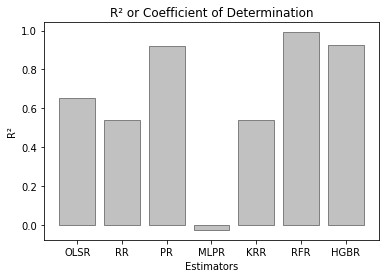

In [ ]:
# R²

import matplotlib.pyplot as plt 

estimators = ('OLSR','RR','PR','MLPR','KRR','RFR','HGBR')

r2_score1 = (olsr_r2_score, rr_r2_score, pr_r2_score, mlpr_r2_score, krr_r2_score, rfr_r2_score,hgbr_r2_score)

plt.bar(estimators, r2_score1,color=(0.6, 0.6, 0.6, 0.6),  edgecolor='grey')

plt.ylabel('R²')

plt.xlabel('Estimators')

plt.title('R² or Coefficient of Determination')

plt.show()



## **Median Absolute Error**



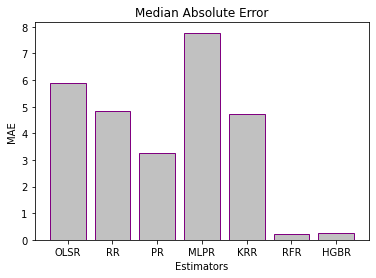

In [ ]:
# Median Absolut Error

import matplotlib.pyplot as plt 

estimators = ('OLSR','RR','PR','MLPR','KRR','RFR','HGBR')

mae_score1 = (olsr_mae_score, rr_mae_score, pr_mae_score, mlpr_mae_score, krr_mae_score, rfr_mae_score,hgbr_mae_score)

plt.bar(estimators, mae_score1,color=(0.6, 0.6, 0.6, 0.6),  edgecolor='purple')

plt.ylabel('MAE')

plt.xlabel('Estimators')

plt.title('Median Absolute Error')

plt.show()

# **Data Preprocessing**

We will then do some pre-processing of the data to improve the performance of the classifiers.


*   Initially, as mentioned above, there are no missing values and categorical values.
*   A very important parameter for the performance of the classifiers is the dimensionality of the data, especially in relation to the available number of samples. As the dimensionality increases, the available data becomes sparse. However, in the compact dataset since it consists of relatively few features, there is no need to apply PCA.
* Features with very large differences in their absolute values ​​can cause problems in education and give classifiers with non-optimal performance. Standard score conversion is necessary for many classifiers to behave properly. It is also more resistant than the min-max to outliers, ie sporadic values ​​that are far from the average value and the rest of the feature values ​​(the min-max will compress most values ​​in a short time).






## **Standard Scaler**



In [ ]:
from sklearn import preprocessing

x_train_scaled = preprocessing.scale(x_train)

scaler = preprocessing.StandardScaler().fit(x_train)

x_test_scaled = scaler.transform(x_test)



# **Estimator Optimization**

Below we will mention the selection of hyperparameters for each of our models. The selection of each hyperparameter for each model was made after a study of its "offer" in our model.



In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.metrics import median_absolute_error as mae



## **Ordinary Least Squares Regressor**

We know that OLSR as a linear model has no hyperparameters. However, with the procedures we did in the pre processing, it makes sense to run the process again


In [ ]:
from sklearn import linear_model

olsr = linear_model.LinearRegression()

start_time = time.time()

olsr = olsr.fit(x_train_scaled,y_train)

times_train_aft['olsr_scaled'] = time.time() - start_time

start_time = time.time()

pred_olsr = olsr.predict(x_test_scaled)

times_test_aft['olsr_scaled'] = time.time() - start_time

olsr_mse = mse(y_test, pred_olsr)

olsr_r2= r2(y_test, pred_olsr)

olsr_mae = mae(y_test, pred_olsr)

In [ ]:
print('Before:',olsr_mse_score,'After:',olsr_mse)

print('Before:',olsr_r2_score,'After:',olsr_r2)

print('Before:',olsr_mae_score,'After:',olsr_mae)

Before: 94.88257928271022 After: 94.88257928271025
Before: 0.6549520846785313 After: 0.654952084678531
Before: 5.895931353635575 After: 5.895931353635559


## **Ridge Regressor**

Selection of hyperparameters: 
* **alpha** :Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization
* **solver**: Solver to use in the computational routines. Contains: auto, svd, cholesky, sparse_cg, sag and lsqr


### Scoring **Mean Squared Error**

* For the hyperparameter alpha we initially chose a wide range of values ​​from 1 to 8. We noticed that the optimal value is in the range 3.7 to 6 so we chose the following values ​​for this parameter.
* Regarding the hyperparameter solver, we have chosen all the possible options.

In [ ]:
# first gridsearch
parameters_rr = { 'solver': ['auto', 'svd','cholesky','sparse_cg','sag','lsqr'],
                  'alpha': [1,2,3,4,5,6,7,8]
                }

rr_mse_ = GridSearchCV(estimator=rr, param_grid = parameters_rr, cv = 10, scoring='neg_mean_squared_error', n_jobs=-1)

rr_mse_.fit(x_train_scaled, y_train)

rr_mse_.best_params_

{'alpha': 5, 'solver': 'sag'}

In [ ]:
parameters_rr = { 'solver': ['auto', 'svd','cholesky','sparse_cg','sag','lsqr'],
                  'alpha': [3.7,3.8,3.9,4,4.1,4.2,4.3,4.4,4.5,4.7,5,5.1,5.2,5.3,5.6,6]
                }

rr_mse_ = GridSearchCV(estimator=rr, param_grid = parameters_rr, cv = 10, scoring='neg_mean_squared_error', n_jobs=-1)

rr_mse_.fit(x_train_scaled, y_train)

rr_mse_.best_params_

{'alpha': 5.2, 'solver': 'lsqr'}

In [ ]:
rr_mse_ = Ridge(solver='sag',alpha=5.2)

start_time = time.time()

rr_mse_.fit(x_train_scaled, y_train)

times_train_aft['rr_mse'] = time.time() - start_time

start_time = time.time()

pred_rr_mse = rr_mse_.predict(x_test_scaled)

times_test_aft['rr_mse'] = time.time() - start_time

rr_mse = mse(y_test,pred_rr_mse)

In [ ]:
print('Before:',rr_mse_score,'After:',rr_mse)

Before: 126.61797133798936 After: 96.08110122466788


### Scoring **R² or Coefficient of Determination**
  
* For the alpha hyperparameter we initially chose a wide range of values ​​from 1 to 40. We noticed that the optimal value is in the range 25 to 39 so we chose the following values ​​for this parameter.
* Regarding the hyperparameter solver, we have chosen all the possible options.


In [ ]:
# first gridsearch
parameters_rr = { 'solver': ['auto', 'svd','cholesky','sparse_cg','sag','lsqr'],
                  'alpha': [1,5,10,15,20,25,30,35,40]
                }

rr_mse_ = GridSearchCV(estimator=rr, param_grid = parameters_rr, cv = 10, scoring='neg_mean_squared_error', n_jobs=-1)

rr_mse_.fit(x_train_scaled, y_train)

rr_mse_.best_params_

{'alpha': 35, 'solver': 'lsqr'}

In [ ]:
parameters_rr = { 'solver': ['auto', 'svd','cholesky','sparse_cg','sag','lsqr'],
                  'alpha':[25,26,27,28,29,30,33,35,36,37,38,39]
                }

rr_r2_ = GridSearchCV(estimator=rr, param_grid = parameters_rr, cv = 10, scoring='r2', n_jobs=-1)

rr_r2_.fit(x_train_scaled, y_train)

rr_r2_.best_params_

{'alpha': 37, 'solver': 'lsqr'}

In [ ]:
rr_r2_ = Ridge(solver='lsqr',alpha=37)

start_time = time.time()

rr_r2_.fit(x_train_scaled, y_train)

times_train_aft['rr_r2'] = time.time() - start_time

start_time = time.time()

pred_rr_r2 = rr_r2_.predict(x_test_scaled)

times_test_aft['rr_r2'] = time.time() - start_time

rr_r2 = r2(y_test,pred_rr_r2)

In [ ]:
print('Before:',rr_r2_score,'After:',rr_r2)

Before: 0.5395438511190653 After: 0.6172430343397566


### Scoring **Median Absolute Error**

* For the alpha hyperparameter we initially chose a wide range of values ​​from 10 to 150. We noticed that the optimal value is in the range 83 to 102 so we chose the following values ​​for this parameter.
* Regarding the hyperparameter solver, we have chosen all the possible options.





In [ ]:
# first gridsearch
parameters_rr = { 'solver': ['auto', 'svd','cholesky','sparse_cg','sag','lsqr'],
                  'alpha': [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
                }

rr_mae_ = GridSearchCV(estimator=rr, param_grid = parameters_rr, cv = 10, scoring='neg_median_absolute_error', n_jobs=-1)

rr_mae_.fit(x_train_scaled, y_train)

rr_mae_.best_params_

{'alpha': 90, 'solver': 'auto'}

In [ ]:
parameters_rr = { 'solver': ['auto', 'svd','cholesky','sparse_cg','sag','lsqr'],
                  'alpha': [83,85,87,89,90,91,93,94,95,96,97,99,100,101,102]
                }

rr_mae_ = GridSearchCV(estimator=rr, param_grid = parameters_rr, cv = 10, scoring='neg_median_absolute_error', n_jobs=-1)

rr_mae_.fit(x_train_scaled, y_train)

rr_mae_.best_params_

{'alpha': 95, 'solver': 'auto'}

In [ ]:
rr_mae_ = Ridge(solver='auto',alpha=95)

start_time = time.time()

rr_mae_.fit(x_train_scaled, y_train)

times_train_aft['rr_mae'] = time.time() - start_time

start_time = time.time()

pred_rr_mae = rr_mae_.predict(x_test_scaled)

times_test_aft['rr_mae'] = time.time() - start_time

rr_mae = mae(y_test,pred_rr_mae)

In [ ]:
print('Before:',rr_mae_score,'After:',rr_mae)

Before: 4.855861167952874 After: 4.76768140592832


## **Polynomial Regressor**

Selection of hyperparameters: 
* **degree** :The degree of the polynomial features.


### Scoring **Mean Squared Error**

* For the hyperparameter degree we initially chose a wide range of values ​​from 1 to 10. We noticed that the optimal value is 4.


In [ ]:
Train_acc = []
Test_acc = []
Train_mse = []
Test_mse = []

for i in range(10):
  pr = PolynomialFeatures(degree=(i+1))

  x_train_p = pr.fit_transform(x_train_scaled)
  x_test_p = pr.fit_transform(x_test_scaled)

  lr = LinearRegression()
  lr.fit(x_train_p, y_train)
  
  Train_acc.append(lr.score(x_train_p, y_train))
  Test_acc.append(lr.score(x_test_p, y_test))

  Train_mse.append(mse(y_train, lr.predict(x_train_p)))
  Test_mse.append(mse(y_test, lr.predict(x_test_p)))


Test_min_degree = Test_mse.index(min(Test_mse)) + 1
Train_min_degree = Train_mse.index(min(Train_mse)) + 1

print('Best degree:', Test_min_degree)

Best degree: 4


In [ ]:
pr_mse_ = PolynomialFeatures(degree = 4)

start_time = time.time()

x_train_new = pr_mse_.fit_transform(x_train_scaled)

times_train_aft['pr_mse'] = time.time() - start_time

start_time = time.time()

x_test_new = pr_mse_.fit_transform(x_test_scaled)

times_test_aft['pr_mse'] = time.time() - start_time

# linear regression for the prediction

lre = LinearRegression()

lre.fit(x_train_new, y_train)

pr_preds_mse = lre.predict(x_test_new)

pr_mse = mse(y_test, pr_preds_mse)

In [ ]:
print('Before:',pr_mse_score,'After:',pr_mse)

Before: 22.360571260586905 After: 0.5714206307953481


### Scoring **R² or Coefficient of Determination**
  
* For the hyperparameter degree we initially chose a wide range of values ​​from 1 to 10. We noticed that the optimal value is 4.


In [ ]:
Train_acc = []
Test_acc = []
Train_r2 = []
Test_r2 = []

for i in range(10):
  pr = PolynomialFeatures(degree=(i+1))

  x_train_p = pr.fit_transform(x_train_scaled)
  x_test_p = pr.fit_transform(x_test_scaled)

  lr = LinearRegression()
  lr.fit(x_train_p, y_train)
  
  Train_acc.append(lr.score(x_train_p, y_train))
  Test_acc.append(lr.score(x_test_p, y_test))

  Train_r2.append(r2(y_train, lr.predict(x_train_p)))
  Test_r2.append(r2(y_test, lr.predict(x_test_p)))


Test_min_degree = Test_r2.index(max(Test_r2)) + 1
Train_min_degree = Train_r2.index(max(Train_r2)) + 1

print('Best degree:', Test_min_degree)

Best degree: 4


In [ ]:
pr_r2_ = PolynomialFeatures(degree = 4)

start_time = time.time()

x_train_new = pr_r2_.fit_transform(x_train_scaled)

times_train_aft['pr_r2'] = time.time() - start_time

start_time = time.time()

x_test_new = pr_r2_.fit_transform(x_test_scaled)

times_test_aft['pr_r2'] = time.time() - start_time

# linear regression for the prediction

lre = LinearRegression()

lre.fit(x_train_new, y_train)

pr_preds_r2 = lre.predict(x_test_new)

pr_r2 = r2(y_test, pr_preds_r2)

In [ ]:
print('Before:',pr_r2_score,'After:',pr_r2)

Before: 0.9186840349704891 After: 0.9979219842154571


### Scoring **Median Absolute Error**

* For the hyperparameter degree we initially chose a wide range of values ​​from 1 to 10. We noticed that the optimal value is 4.


In [ ]:
Train_acc = []
Test_acc = []
Train_mae = []
Test_mae = []

for i in range(10):
  pr = PolynomialFeatures(degree=(i+1))

  x_train_p = pr.fit_transform(x_train_scaled)
  x_test_p = pr.fit_transform(x_test_scaled)

  lr = LinearRegression()
  lr.fit(x_train_p, y_train)
  
  Train_acc.append(lr.score(x_train_p, y_train))
  Test_acc.append(lr.score(x_test_p, y_test))

  Train_mae.append(mse(y_train, lr.predict(x_train_p)))
  Test_mae.append(mse(y_test, lr.predict(x_test_p)))


Test_min_degree = Test_mae.index(min(Test_mae)) + 1
Train_min_degree = Train_mae.index(min(Train_mae)) + 1

print('Best degree:', Test_min_degree)

Best degree: 4


In [ ]:
pr_mae_ = PolynomialFeatures(degree = 4)

start_time = time.time()

x_train_new = pr_mae_.fit_transform(x_train_scaled)

times_train_aft['pr_mae'] = time.time() - start_time

start_time = time.time()

x_test_new = pr_mae_.fit_transform(x_test_scaled)

times_test_aft['pr_mae'] = time.time() - start_time

# linear regression for the prediction

lre = LinearRegression()

lre.fit(x_train_new, y_train)

pr_preds_mae = lre.predict(x_test_new)

pr_mae = mae(y_test, pr_preds_mae)

In [ ]:
print('Before:',pr_mae_score,'After:',pr_mae)

Before: 3.2757812499999996 After: 0.351474609375




## **MLP Regressor**

Selection of hyperparameters:

* **alpha**: L2 penalty (regularization term) parameter.
* **learning_rate_init** :It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.
* **hidden_layers_sizes**: Represents the number of neurons in the ith hidden layer.
* **activation**: Activation function for the hidden layer. It contains: tanh and relu.






### Scoring **Mean Squared Error**

* For the alpha hyperparameter we initially chose a wide range of values ​​from 0.01 to 1. We noticed that the optimal value is in the range 0.001 to 0.1 so we chose the following values ​​for this parameter.
* For the hidden layers size hyperparameter we initially chose a wide range of values ​​from 5 to 55. We noticed that the optimal value is in the range 28 to 37 so we chose the following values ​​for this parameter.
* Regarding the hyperparameter activation, we chose tanh and relu
* For the learning rate init hyperparameter we initially chose a wide range of values ​​from 0.001 to 1. We noticed that the optimal value is in the range 0.19 to 0.27 so we chose the following values ​​for this parameter.

In [ ]:
# first gridsearch
parameters_mlpr = {'learning_rate_init': [0.001,0.01,0.1,1],
                  'activation'    : ['tanh', 'relu'],
                  'hidden_layer_sizes' : [(5,),(15,),(25,),(35,),(45,),(55,)],
                  'alpha': [0.001,0.01,0.1,1]}

mlpr_mse_ = GridSearchCV(estimator=mlpr, param_grid = parameters_mlpr, cv = 10, scoring='neg_mean_squared_error', n_jobs=-1)

mlpr_mse_.fit(x_train_scaled, y_train)

mlpr_mse_.best_params_

{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': (35,),
 'learning_rate_init': 0.1}

In [ ]:
parameters_mlpr = {'learning_rate_init': [0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27],
                  'activation'    : ['tanh', 'relu'],
                  'hidden_layer_sizes' : [(28,),(29,),(30,),(31,),(32,),(33,),(34,),(35,),(36,),(37,)],
                  'alpha': [0.01,0.1,1]}

mlpr_mse_ = GridSearchCV(estimator=mlpr, param_grid = parameters_mlpr, cv = 10, scoring='neg_mean_squared_error', n_jobs=-1)

mlpr_mse_.fit(x_train_scaled, y_train)

mlpr_mse_.best_params_

{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': (30,),
 'learning_rate_init': 0.2}

In [ ]:
mlpr_mse_ = MLPRegressor(hidden_layer_sizes=(30,),activation='relu',alpha=0.01,learning_rate_init=0.2)

start_time = time.time()

mlpr_mse_.fit(x_train_scaled, y_train)

times_train_aft['mlpr_mse'] = time.time() - start_time

start_time = time.time()

pred_mlpr_mse = mlpr_mse_.predict(x_test_scaled)

times_test_aft['mlpr_mse'] = time.time() - start_time

mlpr_mse = mse(y_test,pred_mlpr_mse)

In [ ]:
print('Before:',mlpr_mse_score,'After:',mlpr_mse)

Before: 281.4285904978375 After: 5.40882611843743


### Scoring **R² or Coefficient of Determination**

* For the alpha hyperparameter we initially chose a wide range of values ​​from 0.01 to 1. We noticed that the optimal value is in the range 0.001 to 0.1 so we chose the following values ​​for this parameter.
* For the hidden layers size hyperparameter we initially chose a wide range of values ​​from 5 to 55. We noticed that the optimal value is in the range 13 to 20 so we chose the following values ​​for this parameter.
* Regarding the hyperparameter activation, we chose tanh and relu
* For the learning rate init hyperparameter we initially chose a wide range of values ​​from 0.001 to 1. We noticed that the optimal value is in the range 0.19 to 0.27 so we chose the following values ​​for this parameter.


















In [ ]:
# first gridsearch
parameters_mlpr = {'learning_rate_init': [0.001,0.01,0.1,1],
                  'activation'    : ['tanh', 'relu'],
                  'hidden_layer_sizes' : [(5,),(15,),(25,),(35,),(45,),(55,)],
                  'alpha': [0.001,0.01,0.1,1]}

mlpr_r2_ = GridSearchCV(estimator=mlpr, param_grid = parameters_mlpr, cv = 10, scoring='r2', n_jobs=-1)

mlpr_r2_.fit(x_train_scaled, y_train)

mlpr_r2_.best_params_

{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': (25,),
 'learning_rate_init': 0.1}

In [ ]:
parameters_mlpr = {'learning_rate_init': [0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27],
                  'activation'    : ['tanh', 'relu'],
                  'hidden_layer_sizes' : [(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,)],
                  'alpha': [0.01,0.1,1]
                  }

mlpr_r2_ = GridSearchCV(estimator=mlpr, param_grid = parameters_mlpr, cv = 10, scoring='r2', n_jobs=-1)

mlpr_r2_.fit(x_train_scaled, y_train)

mlpr_r2_.best_params_

{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': (18,),
 'learning_rate_init': 0.23}

In [ ]:
mlpr_r2_ = MLPRegressor(hidden_layer_sizes=(18,),activation='relu',alpha=0.01,learning_rate_init=0.23)

start_time = time.time()

mlpr_r2_.fit(x_train_scaled, y_train)

times_train_aft['mlpr_r2'] = time.time() - start_time

start_time = time.time()

pred_mlpr_r2 = mlpr_r2_.predict(x_test_scaled)

times_test_aft['mlpr_r2'] = time.time() - start_time

mlpr_r2 = r2(y_test,pred_mlpr_r2)

In [ ]:
print('Before:',mlpr_r2_score,'After:',mlpr_r2)

Before: -0.02343706502541454 After: 0.9786242568000572


### Scoring **Median Absolute Error**

* For the alpha hyperparameter we initially chose a wide range of values ​​from 0.001 to 1. We noticed that the optimal value is in the range 0.01 to 1 so we chose the following values ​​for this parameter.
* For the hidden layers size hyperparameter we initially chose a wide range of values ​​from 5 to 55. We noticed that the optimal value is in the range 25 to 33 so we chose the following values ​​for this parameter.
* Regarding the hyperparameter activation, we chose tanh and relu
* For the learning rate init hyperparameter we initially chose a wide range of values ​​from 0.001 to 1. We noticed that the optimal value is in the range 0.19 to 0.27 so we chose the following values ​​for this parameter.

In [ ]:
# first gridsearch
parameters_mlpr = {'learning_rate_init': [0.001,0.01,0.1,1],
                  'activation'    : ['tanh', 'relu'],
                  'hidden_layer_sizes' : [(5,),(15,),(25,),(35,),(45,),(55,)],
                  'alpha': [0.001,0.01,0.1,1]}

mlpr_mae_ = GridSearchCV(estimator=mlpr, param_grid = parameters_mlpr, cv = 10, scoring='neg_median_absolute_error', n_jobs=-1)

mlpr_mae_.fit(x_train_scaled, y_train)

mlpr_mae_.best_params_

{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': (35,),
 'learning_rate_init': 0.1}

In [ ]:
parameters_mlpr = {'learning_rate_init': [0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27],
                  'activation'    : ['tanh', 'relu'],
                  'hidden_layer_sizes' : [(25,),(26,),(27,),(28,),(29,),(30,),(31,),(32,),(33,)],
                  'alpha': [0.01,0.1,1]
                  }

mlpr_mae_ = GridSearchCV(estimator=mlpr, param_grid = parameters_mlpr, cv = 10, scoring='neg_median_absolute_error', n_jobs=-1)

mlpr_mae_.fit(x_train_scaled, y_train)

mlpr_mae_.best_params_

{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': (29,),
 'learning_rate_init': 0.2}

In [ ]:
mlpr_mae_ = MLPRegressor(hidden_layer_sizes=(29,),activation='relu',alpha=0.01,learning_rate_init=0.2)

start_time = time.time()

mlpr_mae_.fit(x_train_scaled, y_train)

times_train_aft['mlpr_mae'] = time.time() - start_time

start_time = time.time()

pred_mlpr_mae = mlpr_mae_.predict(x_test)

times_test_aft['mlpr_mae'] = time.time() - start_time

mlpr_mae = mae(y_test,pred_mlpr_mae)

In [ ]:
print('Before:',mlpr_mae_score,'After:',mlpr_mae)

Before: 7.780190696590958 After: 5.030549725369931


## **Kernel Ridge Regressor**

Selection of hyperparameters: 
* **alpha** :Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization
* **kernel**: Kernel mapping used internally. Kernel contains: linear, polynomial due to the simplicity of the problem. 
* **gama**: Gamma parameter for the RBF, laplacian, polynomial, exponential chi2 and sigmoid kernels.
* **degree**: Degree of the polynomial kernel.

### Scoring **Mean Squared Error**
* For the alpha hyperparameter we initially chose a wide range of values ​​from 0.001 to 1. We noticed that the optimal value is in the range 0.01 to 0.09 so we chose the following values ​​for this parameter.
* For the degree hyperparameter we chose a wide range of values ​​from 1 to 8. We noticed that the optimal value is in the range 3 to 6 so we chose the following values ​​for this parameter.
* Regarding the kernel hyperparameter we chose linear  and polynomial
* For the gamma hyperparameter we chose a wide range of values ​​from 0.001 to 1. We noticed that the optimal value is in the range 0.1 to 1 so we chose the following values ​​for this parameter.


In [ ]:
#first gridsearch
parameters_krr = {'alpha': [0.001,0.005,0.01,0.05,0.1,0.5,1],
                   'degree': [1,2,3,4,5,6,7,8],
                  'kernel': ['linear','polynomial'],
                  'gamma': [0.001,0.005,0.01,0.05,0.1,0.5,1]
                 }

krr_mse_ = GridSearchCV(estimator=krr, param_grid = parameters_krr, cv = 10, scoring='neg_mean_squared_error', n_jobs=-1)

krr_mse_.fit(x_train_scaled, y_train)

krr_mse_.best_params_

{'alpha': 0.01, 'degree': 6, 'gamma': 0.1, 'kernel': 'polynomial'}

In [ ]:
parameters_krr = {'alpha': [0.01,0.02,0.03,0.035,0.04,0.05,0.06,0.07,0.08,0.09],
                   'degree': [3,4,5,6],
                  'kernel': ['linear','polynomial'],
                  'gamma': [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9,1]
                 }

krr_mse_ = GridSearchCV(estimator=krr, param_grid = parameters_krr, cv = 10, scoring='neg_mean_squared_error', n_jobs=-1)

krr_mse_.fit(x_train_scaled, y_train)

krr_mse_.best_params_

{'alpha': 0.06, 'degree': 4, 'gamma': 0.3, 'kernel': 'polynomial'}

In [ ]:
krr_mse_ = KernelRidge(alpha=0.06,degree=4,gamma=0.3,kernel='polynomial')

start_time = time.time()

krr_mse_.fit(x_train_scaled, y_train)

times_train_aft['krr_mse'] = time.time() - start_time

start_time = time.time()

pred_krr_mse =krr_mse_.predict(x_test_scaled)

times_test_aft['krr_mse'] = time.time() - start_time

krr_mse = mse(y_test,pred_krr_mse)

In [ ]:
print('Before:',krr_mse_score,'After:',krr_mse)

Before: 126.42629141320197 After: 0.5880472100803794


### Scoring **R² or Coefficient of Determination**

* For the alpha hyperparameter we initially chose a wide range of values ​​from 0.001 to 1. We noticed that the optimal value is in the range 0.01 to 0.06 so we chose the following values ​​for this parameter.
* For the degree hyperparameter we chose a wide range of values ​​from 1 to 6. We noticed that the optimal value is in the range 3 to 6 so we chose the following values ​​for this parameter.
* Regarding the kernel hyperparameter we chose linear and polynomial
* For the gamma hyperparameter we chose a wide range of values ​​from 0.001 to 1. We noticed that the optimal value is in the range 0.1 to 1 so we chose the following values ​​for this parameter.

In [ ]:
#first gridsearch
parameters_krr = {'alpha': [0.001,0.005,0.01,0.05,0.1,0.5,1],
                   'degree': [1,2,3,4,5,6,7,8],
                  'kernel': ['linear','polynomial'],
                  'gamma': [0.001,0.005,0.01,0.05,0.1,0.5,1]
                 }

krr_r2_ = GridSearchCV(estimator=krr, param_grid = parameters_krr, cv = 10, scoring='r2', n_jobs=-1)

krr_r2_.fit(x_train_scaled, y_train)

krr_r2_.best_params_

{'alpha': 0.05, 'degree': 5, 'gamma': 0.5, 'kernel': 'polynomial'}

In [ ]:
parameters_krr = {'alpha': [0.01,0.02,0.03,0.035,0.04,0.05,0.06,0.07,0.08,0.09],
                   'degree': [3,4,5,6],
                  'kernel': ['linear','polynomial'],
                  'gamma': [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9,1]

                  }
krr_r2_ = GridSearchCV(estimator=krr, param_grid = parameters_krr, cv = 10, scoring='r2', n_jobs=-1)

krr_r2_.fit(x_train_scaled, y_train)

krr_r2_.best_params_

{'alpha': 0.07, 'degree': 4, 'gamma': 0.3, 'kernel': 'polynomial'}

In [ ]:
krr_r2_ = KernelRidge(alpha=0.07,degree=4,gamma=0.3,kernel='polynomial')

start_time = time.time()

krr_r2_.fit(x_train_scaled, y_train)

times_train_aft['krr_r2'] = time.time() - start_time

start_time = time.time()

pred_krr_r2 =krr_r2_.predict(x_test_scaled)

times_test_aft['krr_r2'] = time.time() - start_time

krr_r2 = r2(y_test,pred_krr_r2)

In [ ]:
print('Before:',krr_r2_score,'After:',krr_r2)

Before: 0.5402409101467271 After: 0.9978235717457735


### Scoring **Median Absolute Error**

* For the alpha hyperparameter we initially chose a wide range of values ​​from 0.001 to 1. We noticed that the optimal value is in the range 0.01 to 0.06 so we chose the following values ​​for this parameter.
* For the degree hyperparameter we chose a wide range of values ​​from 1 to 10. We noticed that the optimal value is in the range 5 to 8 so we chose the following values ​​for this parameter.
* Regarding the kernel hyperparameter we chose linear and polynomial
* For the gamma hyperparameter we chose a wide range of values ​​from 0.001 to 1. We noticed that the optimal value is in the range 0.1 to 1 so we chose the following values ​​for this parameter.


In [ ]:
#first gridsearch
parameters_krr = {'alpha': [0.001,0.005,0.01,0.05,0.1,0.5,1],
                   'degree': [1,2,3,4,5,6,7,8],
                  'kernel': ['linear','polynomial'],
                  'gamma': [0.001,0.005,0.01,0.05,0.1,0.5,1]
                 }

krr_mae_ = GridSearchCV(estimator=krr, param_grid = parameters_krr, cv = 10, scoring='neg_median_absolute_error', n_jobs=-1)

krr_mae_.fit(x_train_scaled, y_train)

krr_mae_.best_params_

{'alpha': 0.01, 'degree': 7, 'gamma': 0.5, 'kernel': 'polynomial'}

In [ ]:
parameters_krr = {'alpha': [0.01,0.02,0.03,0.035,0.04,0.05,0.06,0.07,0.08,0.09],
                   'degree': [4,5,6,7],
                  'kernel': ['linear','polynomial'],
                  'gamma': [0.1,0.15,0.20,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

                  }

krr_mae_ = GridSearchCV(estimator=krr, param_grid = parameters_krr, cv = 10, scoring='neg_median_absolute_error', n_jobs=-1)

krr_mae_.fit(x_train_scaled, y_train)

krr_mae_.best_params_

{'alpha': 0.02, 'degree': 6, 'gamma': 0.4, 'kernel': 'polynomial'}

In [ ]:
krr_mae_ = KernelRidge(alpha=0.02,degree=6,kernel='polynomial',gamma=0.4)

start_time = time.time()

krr_mae_.fit(x_train_scaled, y_train)

times_train_aft['krr_mae'] = time.time() - start_time

start_time = time.time()

pred_krr_mae =krr_mae_.predict(x_test_scaled)

times_test_aft['krr_mae'] = time.time() - start_time

krr_mae = mae(y_test,pred_krr_mae)

In [ ]:
print('Before:',krr_mae_score,'After:',krr_mae)

Before: 4.7124803266284605 After: 0.2415609330362733


## **Random Forest Regressor**

* **max_features**: The number of features to consider when looking for the best split.It contains: auto, sqrt,log2
* **criterion**: The function to measure the quality of a split. Supported criteria are “mse” for the mean squared error, which is equal to variance reduction as feature selection criterion, and “mae” for the mean absolute error.
* **n_estimators**: The number of trees in the forest.



### Scoring **Mean Squared Error**

* For the n_estimators hyperparameter we initially chose a wide range of values ​​from 5 to 300. We noticed that the optimal value is in the range 165 to 175 so we chose the following values ​​for this parameter.
* For the max feautures hyperparameter we chose auto, sqrt, log2
* For the criterion hyperparameter we chose mse

In [ ]:
#first gridsearch
parameters_rfr = {'max_features': ['auto','sqrt','log2'],
                  'criterion' : ['mse'],
                  'n_estimators': [5,10,30,50,70,90,100,120,150,170,200,220,250,270,300]
                  }

rfr_mse_ = GridSearchCV(estimator=rfr, param_grid = parameters_rfr, cv = 10, scoring='neg_mean_squared_error', n_jobs=-1)

rfr_mse_.fit(x_train_scaled, y_train)

rfr_mse_.best_params_

{'criterion': 'mse', 'max_features': 'auto', 'n_estimators': 170}

In [ ]:
parameters_rfr = {'max_features': ['auto','sqrt','log2'],
                  'criterion' : ['mse'],
                  'n_estimators': [165,166,167,168,169,170,171,172,173,174,175]
                  }

rfr_mse_ = GridSearchCV(estimator=rfr, param_grid = parameters_rfr, cv = 10, scoring='neg_mean_squared_error', n_jobs=-1)

rfr_mse_.fit(x_train_scaled, y_train)

rfr_mse_.best_params_

{'criterion': 'mse', 'max_features': 'auto', 'n_estimators': 168}

In [ ]:
rfr_mse_ = RandomForestRegressor(criterion='mse',max_features='auto',n_estimators=168)

start_time = time.time()

rfr_mse_.fit(x_train_scaled, y_train)

times_train_aft['rfr_mse'] = time.time() - start_time

start_time = time.time()

pred_rfr_mse =rfr_mse_.predict(x_test_scaled)

times_test_aft['rfr_mse'] = time.time() - start_time

rfr_mse = mse(y_test,pred_rfr_mse)

In [ ]:
print('Before:',rfr_mse_score,'After:',rfr_mse)

Before: 2.4235411445098216 After: 2.3911595550720377


### Scoring **R² or Coefficient of Determination**

* For the n_estimators hyperparameter we initially chose a wide range of values ​​from 5 to 300. We noticed that the optimal value is in the range 165 to 175so we chose the following values ​​for this parameter.
* For the max feautures hyperparameter we chose auto, sqrt, log2
* For the criterion hyperparameter we chose mse, mae

In [ ]:
#first gridsearch
parameters_rfr = {'max_features': ['auto'],
                  'criterion' : ['mse'],
                  'n_estimators': [5,10,30,50,70,90,100,120,150,170,200,220,250,270,300]
                  }

rfr_r2_ = GridSearchCV(estimator=rfr, param_grid = parameters_rfr, cv = 10, scoring='r2', n_jobs=-1)

rfr_r2_.fit(x_train_scaled, y_train)

rfr_r2_.best_params_

{'criterion': 'mse', 'max_features': 'auto', 'n_estimators': 170}

In [ ]:
parameters_rfr = {'max_features': ['auto','sqrt','log2'],
                  'criterion' : ['mse','mae'],
                  'n_estimators': [140,150,160,167,168,169,170,171,172,173,210]
                  }

rfr_r2_ = GridSearchCV(estimator=rfr, param_grid = parameters_rfr, cv = 10, scoring='r2', n_jobs=-1)

rfr_r2_.fit(x_train_scaled, y_train)

rfr_r2_.best_params_

{'criterion': 'mae', 'max_features': 'auto', 'n_estimators': 170}

In [ ]:
rfr_r2_ = RandomForestRegressor(criterion='mae',max_features='auto',n_estimators=170)

start_time = time.time()

rfr_r2_.fit(x_train_scaled, y_train)

times_train_aft['rfr_r2'] = time.time() - start_time

start_time = time.time()

pred_rfr_r2 =rfr_r2_.predict(x_test_scaled)

times_test_aft['rfr_r2'] = time.time() - start_time

rfr_r2 = r2(y_test,pred_rfr_r2)

In [ ]:
print('Before:',rfr_r2_score,'After:',rfr_r2)

Before: 0.9911866032107192 After: 0.990838742724265


### Scoring **Median Absolute Error**

* For the n_estimators hyperparameter we initially chose a wide range of values ​​from 5 to 300. We noticed that the optimal value is in the range 165 to 175 so we chose the following values ​​for this parameter.
* For the max feautures hyperparameter we chose auto, sqrt, log2
* For the criterion hyperparameter we chose mae

In [ ]:
#first gridsearch
parameters_rfr = {'max_features': ['auto','sqrt','log2'],
                  'criterion' : ['mse'],
                  'n_estimators': [5,10,30,50,70,90,100,120,150,170,200,220,250,270,300]
                  }

rfr_mae_ = GridSearchCV(estimator=rfr, param_grid = parameters_rfr, cv = 10, scoring='neg_median_absolute_error', n_jobs=-1)

rfr_mae_.fit(x_train_scaled, y_train)

rfr_mae_.best_params_

{'criterion': 'mse', 'max_features': 'auto', 'n_estimators': 170}

In [ ]:
parameters_rfr = {'max_features': ['auto','sqrt','log2'],
                  'criterion' : ['mae'],
                  'n_estimators': [165,166,167,168,169,170,171,172,173,174,175]
                  }

rfr_mae_ = GridSearchCV(estimator=rfr, param_grid = parameters_rfr, cv = 10, scoring='neg_median_absolute_error', n_jobs=-1)

rfr_mae_.fit(x_train_scaled, y_train)

rfr_mae_.best_params_

{'criterion': 'mae', 'max_features': 'auto', 'n_estimators': 168}

In [ ]:
rfr_mae_ = RandomForestRegressor(criterion='mae',max_features='auto',n_estimators=168)

start_time = time.time()

rfr_mae_.fit(x_train_scaled, y_train)

times_train_aft['rfr_mae'] = time.time() - start_time

start_time = time.time()

pred_rfr_mae =rfr_mae_.predict(x_test_scaled)

times_test_aft['rfr_mae'] = time.time() - start_time

rfr_mae = mae(y_test,pred_rfr_mae)

In [ ]:
print('Before:',rfr_mae_score,'After:',rfr_mae)

Before: 0.21839999999999932 After: 0.2108630952380982


## **Hist Gradient Boosting Regressor**

* **max_iter**: The maximum number of iterations of the boosting process, i.e. the maximum number of trees.
* **scoring**: Scoring parameter to use for early stopping. It can be a single string or a callable. It contains: r2,loss,neg median absolute error, negative mean squared error.
* **learning_rate**: This is used as a multiplicative factor for the leaves values.
* **l2_regulatization**: The L2 regularization parameter. Use 0 for no regularization.




### Scoring **Mean Squared Error**

* For the max_iter hyperparameter we initially chose a wide range of values ​​from 25 to 105. We noticed that the optimal value is in the range 27 to 39 so we chose the following values ​​for this parameter.
* For the max scoring hyperparameter we r2,loss, negative median absolute error, negative mean squared error
* For the l2 regularization hyperparameter we  chose a range of values ​​from 0 to 1.
* For the learning rate hyperparameter we initially chose a wide range of values ​​from 0.00001 to 2. We noticed that the optimal value is in the range 0.1 to 0.2 so we chose the following values ​​for this parameter.

In [ ]:
#first gridsearch
parameters_hgbr = {'max_iter': [25,35,45,55,65,75,85,95,105],
                  'scoring' : ['neg_mean_squared_error'],
                  'learning_rate': [0.001,0.01,0.1,1,1.5,2],
                   'l2_regularization' : [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
                  }

hgbr_mse_ = GridSearchCV(estimator=hgbr, param_grid = parameters_hgbr, cv = 10, scoring='neg_mean_squared_error', n_jobs=-1)

hgbr_mse_.fit(x_train_scaled, y_train)

hgbr_mse_.best_params_

{'l2_regularization': 0,
 'learning_rate': 0.1,
 'max_iter': 35,
 'scoring': 'neg_mean_squared_error'}

In [ ]:
parameters_hgbr = {'max_iter': [27,28,29,30,31,32,33,34,35,36,37,38,39],
                  'scoring' : ['neg_mean_squared_error'],
                  'learning_rate': [0.1,0.11,0.12,0.13,0.15,0.17,0.19,0.2],
                   'l2_regularization' : [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
                  }

hgbr_mse_ = GridSearchCV(estimator=hgbr, param_grid = parameters_hgbr, cv = 10, scoring='neg_mean_squared_error', n_jobs=-1)

hgbr_mse_.fit(x_train_scaled, y_train)

hgbr_mse_.best_params_

{'l2_regularization': 0,
 'learning_rate': 0.13,
 'max_iter': 37,
 'scoring': 'neg_mean_squared_error'}

In [ ]:
hgbr_mse_ = HistGradientBoostingRegressor(max_iter=30,l2_regularization=0.5,learning_rate=0.12,scoring='neg_mean_squared_error')

start_time = time.time()

hgbr_mse_.fit(x_train_scaled, y_train)

times_train_aft['hgbr_mse'] = time.time() - start_time

start_time = time.time()

pred_hgbr_mse =hgbr_mse_.predict(x_test_scaled)

times_test_aft['hgbr_mse'] = time.time() - start_time

hgbr_mse = mse(y_test,pred_hgbr_mse)

In [ ]:
print('Before:',hgbr_mse_score,'After:',hgbr_mse)

Before: 20.17255684818316 After: 18.770094000177163


### Scoring **R² or Coefficient of Determination**

* For the max_iter hyperparameter we initially chose a wide range of values ​​from 25 to 105. We noticed that the optimal value is in the range 27 to 39 so we chose the following values ​​for this parameter.
* For the max scoring hyperparameter we r2,loss, negative median absolute error, negative mean squared error
* For the l2 regularization hyperparameter we  chose a range of values ​​from 0 to 1.
* For the learning rate hyperparameter we initially chose a wide range of values ​​from 0.001 to 2. We noticed that the optimal value is in the range 0.1 to 0.2 so we chose the following values ​​for this parameter.

In [ ]:
#first gridsearch
parameters_hgbr = {'max_iter': [25,35,45,55,65,75,85,95,105],
                  'scoring' : ['r2'],
                  'learning_rate': [0.001,0.01,0.1,1,1.5,2],
                   'l2_regularization' : [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
                  }

hgbr_r2_ = GridSearchCV(estimator=hgbr, param_grid = parameters_hgbr, cv = 10, scoring='r2', n_jobs=-1)

hgbr_r2_.fit(x_train_scaled, y_train)

hgbr_r2_.best_params_

{'l2_regularization': 0.4,
 'learning_rate': 0.1,
 'max_iter': 35,
 'scoring': 'r2'}

In [ ]:
parameters_hgbr = {'max_iter': [27,28,29,30,31,32,33,34,35,36,37,38,39],
                  'scoring' : ['r2'],
                  'learning_rate': [0.1,0.11,0.12,0.13,0.15,0.17,0.19,0.2],
                   'l2_regularization' : [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
                  }

hgbr_r2_ = GridSearchCV(estimator=hgbr, param_grid = parameters_hgbr, cv = 10, scoring='r2', n_jobs=-1)

hgbr_r2_.fit(x_train_scaled, y_train)

hgbr_r2_.best_params_

{'l2_regularization': 0.7,
 'learning_rate': 0.13,
 'max_iter': 28,
 'scoring': 'r2'}

In [ ]:
hgbr_r2_ = HistGradientBoostingRegressor(max_iter=28,l2_regularization=0.7,learning_rate=0.13,scoring='r2')

start_time = time.time()

hgbr_r2_.fit(x_train_scaled, y_train)

times_train_aft['hgbr_r2'] = time.time() - start_time

start_time = time.time()

pred_hgbr_r2 =hgbr_r2_.predict(x_test_scaled)

times_test_aft['hgbr_r2'] = time.time() - start_time

hgbr_r2 = r2(y_test,pred_hgbr_r2)

In [ ]:
print('Before:',hgbr_r2_score,'After:',hgbr_r2)

Before: 0.9266409203903484 After: 0.9316981389597387


### Scoring **Median Absolute Error**

* For the max_iter hyperparameter we initially chose a wide range of values ​​from 20 to 105. We noticed that the optimal value is in the range 27 to 39 so we chose the following values ​​for this parameter.
* For the max scoring hyperparameter we r2,loss, negative median absolute error, negative mean squared error
* For the l2 regularization hyperparameter we  chose a range of values ​​from 0 to 1.
* For the learning rate hyperparameter we initially chose a wide range of values ​​from 0.00001 to 2. We noticed that the optimal value is in the range 0.1 to 0.2 so we chose the following values ​​for this parameter.

In [ ]:
#first gridsearch
parameters_hgbr = {'max_iter': [25,35,45,55,65,75,85,95,105],
                  'scoring' : ['neg_mean_squared_error'],
                  'learning_rate': [0.001,0.01,0.1,1,1.5,2],
                   'l2_regularization' : [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
                  }

hgbr_mae_ = GridSearchCV(estimator=hgbr, param_grid = parameters_hgbr, cv = 10, scoring='neg_mean_squared_error', n_jobs=-1)

hgbr_mae_.fit(x_train_scaled, y_train)

hgbr_mae_.best_params_

{'l2_regularization': 0,
 'learning_rate': 0.1,
 'max_iter': 35,
 'scoring': 'neg_median_absolute_error'}

In [ ]:
parameters_hgbr = { 'max_iter': [27,28,29,30,31,32,33,34,35,36,37,38,39],
                    'scoring' : ['neg_median_absolute_error'],
                    'learning_rate': [0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2],
                   'l2_regularization' : [1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0]
                  }

hgbr_mae_ = GridSearchCV(estimator=hgbr, param_grid = parameters_hgbr, cv = 10, scoring='neg_mean_squared_error', n_jobs=-1)

hgbr_mae_.fit(x_train_scaled, y_train)

hgbr_mae_.best_params_

{'l2_regularization': 0,
 'learning_rate': 0.13,
 'max_iter': 37,
 'scoring': 'neg_median_absolute_error'}

In [ ]:
hgbr_mae_ = HistGradientBoostingRegressor(max_iter=37,l2_regularization=0,learning_rate=0.13,scoring='neg_mean_squared_error')

start_time = time.time()

hgbr_mae_.fit(x_train_scaled, y_train)

times_train_aft['hgbr_mae'] = time.time() - start_time

start_time = time.time()

pred_hgbr_mae = hgbr_mae_.predict(x_test_scaled)

times_test_aft['hgbr_mae'] = time.time() - start_time

hgbr_mae = mae(y_test,pred_hgbr_mae)

In [ ]:
print('Before:',hgbr_mae_score,'After:',hgbr_mae)

Before: 0.4027045464534327 After: 0.5067246675329684


# **Bar Plot Before-After**

## **Mean Square Error**

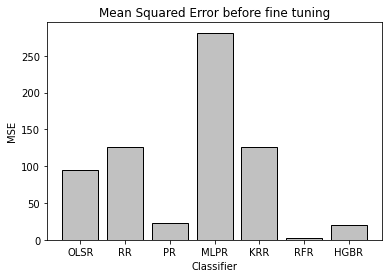

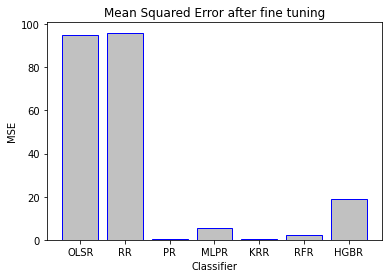

In [ ]:
# Mean Square Error

import matplotlib.pyplot as plt 

mse_score=()

estimators = ('OLSR','RR','PR','MLPR','KRR','RFR','HGBR')

mse_score = (olsr_mse, rr_mse, pr_mse, mlpr_mse, krr_mse, rfr_mse,hgbr_mse)

plt.bar(estimators , mse_score1,color=(0.6, 0.6, 0.6, 0.6),  edgecolor='black')

plt.ylabel('MSE')

plt.xlabel('Classifier')

plt.title('Mean Squared Error before fine tuning')

plt.show()

plt.bar(estimators , mse_score,color=(0.6, 0.6, 0.6, 0.6),  edgecolor='blue')

plt.ylabel('MSE')

plt.xlabel('Classifier')

plt.title('Mean Squared Error after fine tuning')

plt.show()

In general, we observe that after fine tuning all the results regarding the mean squared error metric improved. Specifically for the regressors selected:

Ordinary Least Square Regressor: Initially, we noticed a stability: 94.88

Ridge Regressor: Initially, we noticed an error value: 126.61 and finally reached out 96.08

Polynomial Net Regressor: Initially, we noticed an error value: 22.36 and finally reached out 0.57

Multi Layer Perceptron Regressor: Initially, we noticed an error value: 281.42 and finally reached out 5.40

Kernel Ridge Regressor: Initially, we noticed an error value: 126.42 and finally reached out 0.58

Random Forest Regressor: Initially, we noticed an error value: 2.42 and finally reached out 2.39

Hist Gradient Boosting Regressor: Initially, we noticed an error value: 20.17 and finally reached out 18.77

## **R² or Coefficient of Determination**

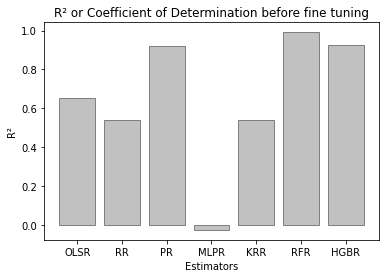

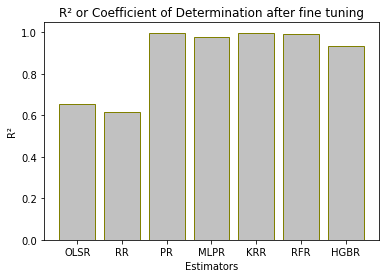

In [ ]:
# R²

import matplotlib.pyplot as plt 

r2_score=()

estimators = ('OLSR','RR','PR','MLPR','KRR','RFR','HGBR')

r2_score = (olsr_r2, rr_r2, pr_r2, mlpr_r2, krr_r2, rfr_r2,hgbr_r2)

plt.bar(estimators, r2_score1,color=(0.6, 0.6, 0.6, 0.6),  edgecolor='grey')

plt.ylabel('R²')

plt.xlabel('Estimators')

plt.title('R² or Coefficient of Determination before fine tuning')

plt.show()

plt.bar(estimators, r2_score,color=(0.6, 0.6, 0.6, 0.6),  edgecolor='olive')

plt.ylabel('R²')

plt.xlabel('Estimators')

plt.title('R² or Coefficient of Determination after fine tuning')

plt.show()




In general, we observe that after fine tuning all results regarding R² metric improved or remained relatively constant. Specifically for the regressors selected:

**Ordinary Least Square Regressor**: We observe a stability in the determination factor: 0.65

**Ridge Regressor**: Initially, we observed a value of the coefficient of determination: 0.53 and we finally reached out 0.61

**Polynomial Net Regressor**: Initially, we observed a value of the coefficient of determination: 0.91 and we finally reached out 0.99

**Multi Layer Perceptron Regressor**: Initially, we noticed a negative value of coefficient of determination and we finally reached out 0.97

**Kernel Ridge Regressor**: Initially, we observed a value of the coefficient of determination: 0.54 and we finally reached out 0.99

**Random Forest Regressor**: In both ways we reached out a value of the coeffiecient of determination: 0.99

**Hist Gradient Boosting Regressor**: Initially, we observed a value of the coefficient of determination: 0.92 and we finally reached out 0.93

## **Median Absolute Error**

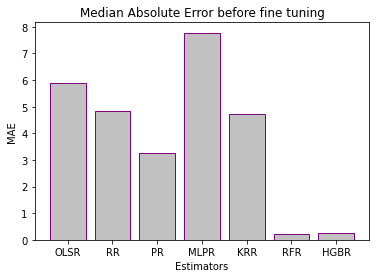

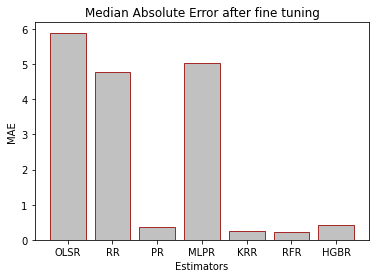

In [ ]:
# Median Absolut Error

import matplotlib.pyplot as plt 

mae_score=()

estimators = ('OLSR','RR','PR','MLPR','KRR','RFR','HGBR')

mae_score = (olsr_mae, rr_mae, pr_mae, mlpr_mae, krr_mae, rfr_mae,hgbr_mae)

plt.bar(estimators, mae_score1,color=(0.6, 0.6, 0.6, 0.6),  edgecolor='purple')

plt.ylabel('MAE')

plt.xlabel('Estimators')

plt.title('Median Absolute Error before fine tuning')

plt.show()

plt.bar(estimators, mae_score,color=(0.6, 0.6, 0.6, 0.6),  edgecolor='brown')

plt.ylabel('MAE')

plt.xlabel('Estimators')

plt.title('Median Absolute Error after fine tuning')

plt.show()

In general, we observe that after fine tuning all the results regarding the median absolute error metric improved. Specifically for the regressors selected:

**Ordinary Least Square Regressor**: Initially, we noticed a stability: 5.89

**Ridge Regressor**: Initially, we noticed an error value: 4.85 and finally we reached out 4.76

**Polynomial Regressor**: Initially, we noticed an error value: 3.27 and finally we reached out 0.35

**Multi Layer Perceptron Regressor**: Initially, we noticed an error value: 7.78 and finally we reached out 5.03

**Kernel Ridge Regressor**: Initially, we noticed an error value: 4.71 and finally we reached out 0.24

**Random Forest Regressor**: Initially, we noticed a stability: 0.21

**Hist Gradient Boosting Regressor**: Initially, we noticed an error value: 0.2 and finally we reached out 0.013




# **Aggregated Results for Accuracy Metrics**


## **Aggregated Results for Mean Squared Error**


In [ ]:
MSE_Final=pd.DataFrame()

Estimators=pd.DataFrame(estimators)

MSE_before=pd.DataFrame(mse_score1)

MSE_after=pd.DataFrame(mse_score)

diff=(MSE_before-MSE_after)*100

final_mse=pd.concat([Estimators,MSE_before,MSE_after,diff], axis=1)

final_mse.columns=['Estimators','Before','After','Diff%']

final_mse.set_index('Estimators', inplace=True)

print(final_mse)

                Before      After         Diff%
Estimators                                     
OLSR         94.882579  94.882579 -2.842171e-12
RR          126.617971  96.081101  3.053687e+03
PR           22.360571   0.571421  2.178915e+03
MLPR        281.428590   5.408826  2.760198e+04
KRR         126.426291   0.588047  1.258382e+04
RFR           2.423541   2.391160  3.238159e+00
HGBR         20.172557  18.770094  1.402463e+02


## **Aggregated Results for R²**

In [ ]:
R2_Final=pd.DataFrame()

Estimators=pd.DataFrame(estimators)

R2_before=pd.DataFrame(r2_score1)

R2_after=pd.DataFrame(r2_score)

diff=(R2_after-R2_before)*100

final_r2=pd.concat([Estimators,R2_before,R2_after,diff], axis=1)

final_r2.columns=['Estimators','Before','After','Diff%']

final_r2.set_index('Estimators', inplace=True)

print(final_r2)

              Before     After         Diff%
Estimators                                  
OLSR        0.654952  0.654952 -2.220446e-14
RR          0.539544  0.617243  7.769918e+00
PR          0.918684  0.997922  7.923795e+00
MLPR       -0.023437  0.978624  1.002061e+02
KRR         0.540241  0.997824  4.575827e+01
RFR         0.991187  0.990839 -3.478605e-02
HGBR        0.926641  0.931698  5.057219e-01


## **Aggregated Results for Median Absolute Error**

In [ ]:
MAE_Final=pd.DataFrame()

Estimators=pd.DataFrame(estimators)

MAE_before=pd.DataFrame(mae_score1)

MAE_after=pd.DataFrame(mae_score)

diff=(MAE_before-MAE_after)*100

final_mae=pd.concat([Estimators,MAE_before,MAE_after,diff], axis=1)

final_mae.columns=['Estimators','Before','After','Diff%']

final_mae.set_index('Estimators', inplace=True)

print(final_mae)

              Before     After         Diff%
Estimators                                  
OLSR        5.895931  5.895931  1.598721e-12
RR          4.855861  4.767681  8.817976e+00
PR          3.275781  0.351475  2.924307e+02
MLPR        7.780191  5.030550  2.749641e+02
KRR         4.712480  0.241561  4.470919e+02
RFR         0.218400  0.210863  7.536905e-01
HGBR        0.260299  0.420883 -1.605843e+01


# **Aggregated Results for Time**

## **Before Fine Tuning**






In [ ]:
times_train_before=pd.DataFrame([times_train_bef])
times_test_before=pd.DataFrame([times_test_bef])

times_test_before=times_test_before.T
times_train_before=times_train_before.T

final_times_before=pd.concat([times_train_before,times_test_before], axis=1)

final_times_before.columns=['Train','Test']

print(final_times_before)

         Train      Test
olsr  0.004654  0.001454
rr    0.003373  0.002602
pr    0.003439  0.003231
mlpr  0.242181  0.002219
krr   0.013557  0.002054
rfr   0.157595  0.008438
hgbr  0.075769  0.003544


## **After Fine Tuning**



In [ ]:
times_train_after=pd.DataFrame([times_train_aft])
times_test_after=pd.DataFrame([times_test_aft])

times_test_after=times_test_after.T
times_train_after=times_train_after.T

final_times_after=pd.concat([times_train_after,times_test_after], axis=1)

final_times_after.columns=['Train','Test']

print(final_times_after)

                Train      Test
olsr_scaled  0.000867  0.000163
rr_mse       0.002091  0.000296
rr_r2        0.001585  0.000198
rr_mae       0.001088  0.000261
pr_mse       0.001354  0.000709
pr_r2        0.001480  0.001877
pr_mae       0.002162  0.000816
mlpr_mse     0.067657  0.000239
mlpr_r2      0.052081  0.000202
mlpr_mae     0.044178  0.001696
krr_mse      0.008835  0.002624
krr_r2       0.007034  0.002574
krr_mae      0.014950  0.002570
rfr_mse      0.225274  0.012236
rfr_r2       0.462283  0.012939
rfr_mae      0.458878  0.013492
hgbr_mse     0.026187  0.000791
hgbr_r2      0.028579  0.000835
hgbr_mae     0.025894  0.000807


Due to preprocessing time periods have been decreased in both Train and Test sets.